# Notebook 2 - Design of inhibitors against histamine H1 receptor

By Vincent Blay, November 2021

In this notebook, we demonstrate the use of MACAW embeddings to model binding affinity to a protein receptor of pharmacological interest. MACAW embeddings are then applied to identify promising candidate molecules in a custom virtual library.

In [1]:
pwd

'C:\\Users\\Enka\\Desktop\\LDRD\\macaw_repo\\notebooks'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVR
from sklearn_rvm import EMRVR

#Needed to show molecules
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 

import macaw_py
print(macaw_py.__version__)
from macaw_py import *

%run "./plotting.py"

0.1.11


## 1. Binding to histamine H1 receptor

### 1.1 Data preparation

In [3]:
df = pd.read_csv("../data/data_H1.csv")
Y = df.pKi
smiles = df.Smiles
df.head()

,ID,compound_id,Smiles,pKi
0,1,CHEMBL3925977,O=C(O)c1ccc2cccnc2c1N1CCN(CCc2ccc(OCCCN3CCCCCC...,5.599999
1,2,CHEMBL2171045,O=C(NS(=O)(=O)c1cccc(C(F)(F)F)c1)N1CCC(N2CCC(O...,7.400008
2,3,CHEMBL3753784,COc1ccc(CNc2nc(N3CCN(C)CC3)nc3c2CCc2ccccc2-3)c...,5.200000
3,4,CHEMBL3917794,O=C(O)c1ccc2cccc(N3CCN(CCc4ccc(OCCCN5CCCCCC5)c...,6.599998
4,5,CHEMBL240394,O=C(c1cc(F)cc(F)c1)N1CCN(c2ccc(OCCCN3CCCCC3)cc...,5.700001


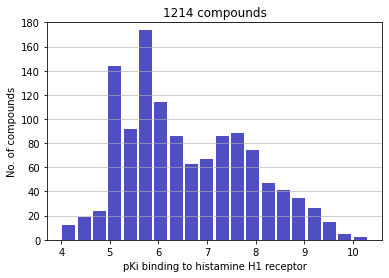

In [4]:
plot_histogram(Y, xlabel="pKi binding to histamine H1 receptor")

In [5]:
smi_train, smi_test, y_train, y_test = train_test_split(smiles, Y, test_size=0.2, random_state=42)

### 1.2 Compute MACAW embeddings

In [6]:
mcw = MACAW_optimus(smi_train, y=y_train, verbose=True, C=10)
#mcw = MACAW(type_fp='atompairs', metric='sokal',n_components=15)

Problem type identified as regression
morgan2 + tanimoto: 0.510
morgan3 + tanimoto: 0.524
rdk5 + tanimoto: 0.591
rdk7 + tanimoto: 0.585
featmorgan2 + tanimoto: 0.528
featmorgan3 + tanimoto: 0.524
maccs + tanimoto: 0.455
avalon + tanimoto: 0.611
atompairs + tanimoto: 0.634
torsion + tanimoto: 0.585
pattern + tanimoto: 0.618
secfp6 + tanimoto: 0.562
layered + tanimoto: 0.625
pattern + cosine: 0.589
pattern + dice: 0.589
pattern + sokal: 0.621
pattern + kulczynski: 0.591
pattern + mcconnaughey: 0.591
pattern + braun-blanquet: 0.583
pattern + rogot-goldberg: 0.583
pattern + asymmetric: 0.566
pattern + manhattan: 0.572
layered + cosine: 0.616
layered + dice: 0.621
layered + sokal: 0.642
layered + kulczynski: 0.603
layered + mcconnaughey: 0.603
layered + braun-blanquet: 0.631
layered + rogot-goldberg: 0.629
layered + asymmetric: 0.592
layered + manhattan: 0.640
atompairs + cosine: 0.607
atompairs + dice: 0.622
atompairs + sokal: 0.622
atompairs + kulczynski: 0.608
atompairs + mcconnaughey: 0

In [27]:
mcw = MACAW(type_fp='atompairs', metric='sokal', n_components=15)
mcw.fit(smi_train, Y=y_train, random_state=42)

In [28]:
X_train = mcw.transform(smi_train)
X_train.shape

(971, 15)

In [29]:
X_test = mcw.transform(smi_test)
X_test.shape

(243, 15)

### 1.3 Modeling using a SVR

In [10]:
for C in [1,3,5,7,10,30,50]:
    regr = SVR(kernel='rbf', C=C, epsilon=.3)
 
    scores = cross_val_score(regr, X_train, y_train, cv = 5)
    print(scores.mean())

0.6815950482967909
0.6934124793891876
0.6986480922926546
0.6989065508884014
0.6978201397208116
0.6868467072599966
0.6737996697804329


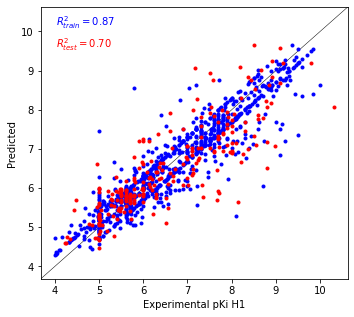

In [30]:
regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train,y=y_train_pred,x_test=y_test,y_test=y_test_pred, 
            xlabel="Experimental pKi H1", savetitle="../results/H1_SVR.png") 

## 2. Binding to muscarinic receptor M2

### 2.1 Data preparation

In [31]:
df = pd.read_csv("../data/data_M2.csv")
Y = df.pKi
smiles = df.Smiles
df.head()

,ID,compound_id,Smiles,pKi
0,1,CHEMBL358493,C[N+]12CCC(CC1)C(O)(c1cc3ccccc3o1)C2,5.259637
1,2,CHEMBL343236,c1ccc2c(c1)CC(C1CN3CCC1CC3)O2,6.309894
2,3,CHEMBL150845,CC(=C1CCN(C2CCN(C(=O)c3ccc(F)c4ccccc34)CC2)CC1...,8.017729
3,4,CHEMBL593871,C[C@H]1OC[C@@H](C[N+](C)(C)C)O[C@@H]1C,4.780000
4,5,CHEMBL91404,CCOC(=O)N1CCC(N2CCC(C(=O)c3ccc(S(=O)(=O)c4ccc5...,9.886057


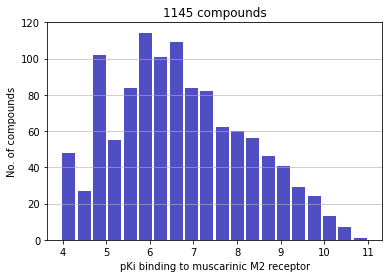

In [32]:
plot_histogram(Y, xlabel="pKi binding to muscarinic M2 receptor")

In [33]:
smi_train, smi_test, y_train, y_test = train_test_split(smiles, Y, test_size = 0.2, random_state = 42)

In [34]:
len(smi_train)

916

### 2.2 Compute MACAW embeddings

In [35]:
mcw2 = MACAW_optimus(smi_train, y= y_train, C=5, verbose=True, n_landmarks=200)
#mcw2 = MACAW(type_fp='atompairs', metric='rogot-goldberg')

Problem type identified as regression
morgan2 + tanimoto: 0.589
morgan3 + tanimoto: 0.565
rdk5 + tanimoto: 0.594
rdk7 + tanimoto: 0.578
featmorgan2 + tanimoto: 0.526
featmorgan3 + tanimoto: 0.578
maccs + tanimoto: 0.494
avalon + tanimoto: 0.572
atompairs + tanimoto: 0.610
torsion + tanimoto: 0.584
pattern + tanimoto: 0.591
secfp6 + tanimoto: 0.510
layered + tanimoto: 0.600
rdk5 + cosine: 0.608
rdk5 + dice: 0.600
rdk5 + sokal: 0.590
rdk5 + kulczynski: 0.615
rdk5 + mcconnaughey: 0.615
rdk5 + braun-blanquet: 0.576
rdk5 + rogot-goldberg: 0.609
rdk5 + asymmetric: 0.589
rdk5 + manhattan: 0.557
layered + cosine: 0.587
layered + dice: 0.582
layered + sokal: 0.589
layered + kulczynski: 0.592
layered + mcconnaughey: 0.592
layered + braun-blanquet: 0.570
layered + rogot-goldberg: 0.591
layered + asymmetric: 0.578
layered + manhattan: 0.579
atompairs + cosine: 0.606
atompairs + dice: 0.615
atompairs + sokal: 0.589
atompairs + kulczynski: 0.579
atompairs + mcconnaughey: 0.579
atompairs + braun-blan

In [36]:
X_train = mcw2.transform(smi_train)
print(X_train.shape)

X_test = mcw2.transform(smi_test)
print(X_test.shape)

(916, 15)
(229, 15)


### 2.3 Modeling using a SVR

In [17]:
for C in [1,3,5,10,30]:
    regr2 = SVR(kernel='rbf', C=C, epsilon=.5)
 
    scores = cross_val_score(regr2, X_train, y_train, cv = 5)
    print(scores.mean())

0.6784833085567896
0.7039528179667235
0.7100512810677193
0.7079396054975858
0.6936422093999142


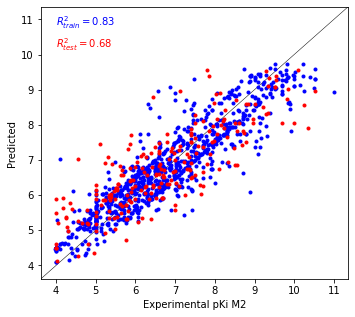

In [37]:
regr2 = SVR(kernel='rbf', C=5, epsilon=.5)
regr2.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr2.predict(X_train)

# Test set predictions
y_test_pred = regr2.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred, 
            xlabel="Experimental pKi M2", savetitle="../results/M2_SVR.png")

## 3. Discovery of new hits specific to H1

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` and `regr2` above, which use 15-D MACAW embeddings as their input. The custom library ("LibraryVB.csv") is a custom library compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted binding affinity to the H1 receptor and comparatively low predicted binding affinity to the M2 receptor.

In [38]:
mylib = pd.read_csv("../data/LibraryVB.csv")
print(mylib.shape)
mylib.head()

(19490, 2)


,Smiles,Source
0,NC(=O)NC(=O)Cn1c(=O)c(C#N)cn(C2CC2)c1=O,Enamine_antivirals
1,CC(C)CNC(=O)Cn1c(=O)c(C#N)cn(C2CC2)c1=O,Enamine_antivirals
2,O=C(Cn1cccnc1=O)NC1CCCCCC1,Enamine_antivirals
3,CCC(=O)Nc1ccc(cn1)N1CCOCC1,Enamine_antivirals
4,Cc1nn(C)c(C)c1CC(=O)NC(C1CC1)C1CC1,Enamine_antivirals


In [39]:
smi_lib = mylib.Smiles

In [40]:
X1_lib = mcw.transform(smi_lib)

Y1_lib_pred = regr.predict(X1_lib)

In [41]:
X2_lib = mcw2.transform(smi_lib)

Y2_lib_pred = regr2.predict(X2_lib)

Let us represent the predictions of both models:

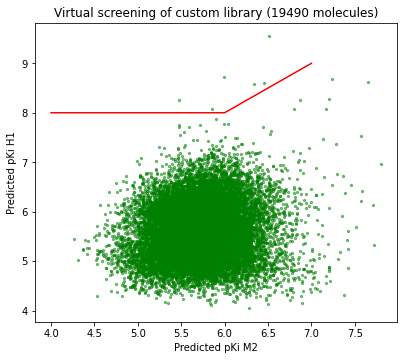

In [67]:
plt.figure(figsize=(6.5,5.5))
plt.scatter(x=Y2_lib_pred,y=Y1_lib_pred, s=5, c='green', alpha=0.5) 
plt.xlabel("Predicted pKi M2")
plt.ylabel("Predicted pKi H1")
plt.title(f"Virtual screening of custom library ({len(smi_lib)} molecules)")
plt.plot([4,6,7],[8,8,9],c='red')
plt.savefig("../results/H1_library_screening.png", bbox_inches='tight', dpi=300, transparent=False)

Let us have a look at the compounds:

In [45]:
idx = np.where((Y1_lib_pred > 8.)*(Y1_lib_pred > (Y2_lib_pred + 2.)))[0]

In [46]:
lead_df = mylib.iloc[idx].copy()
lead_df['pKi_H1_pred'] = Y1_lib_pred[idx]
lead_df['pKi_M2_pred'] = Y2_lib_pred[idx]

lead_df

,Smiles,Source,pKi_H1_pred,pKi_M2_pred
13946,CN(C)CC/C=C\1/c2ccccc2COc2ccccc12,Enamine_Phenotypic,9.543991,6.515522
14673,CN(C)CCN(Cc1ccccc1)c1ccccn1,Enamine_Phenotypic,8.611817,6.456520
15364,CN1CCN2C(C1)c1ccccc1Cc1cccnc21,Enamine_Phenotypic,8.068464,5.855154
17743,C(c1ccccc1)n1c(nc2ccccc12)N1CCNCC1,Enamine_Phenotypic,8.260715,5.471584
19111,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc12,Enamine_Phenotypic,8.573353,6.339479
19341,CN(C)CC/C=C\1/c2ccccc2Sc2ccc(Cl)cc12,Enamine_Phenotypic,8.725719,5.996381


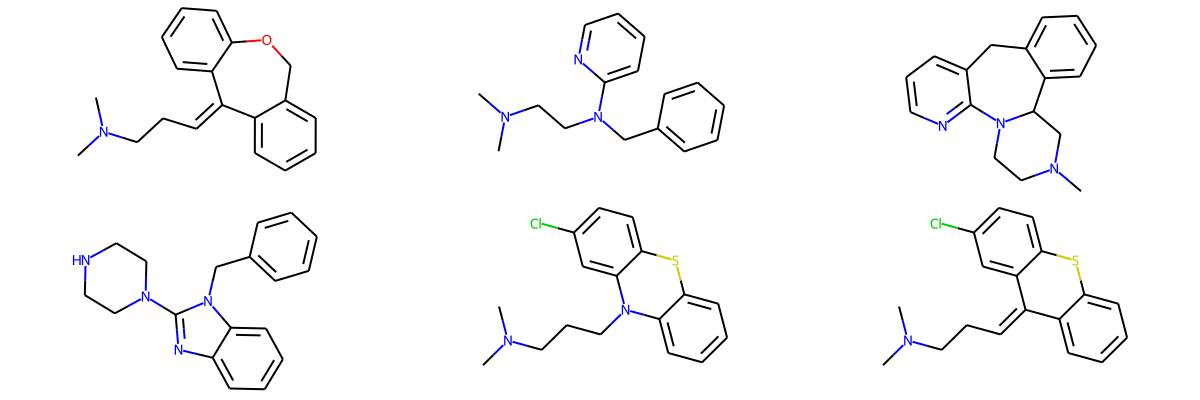

In [63]:
molecules = [Chem.MolFromSmiles(smi) for smi in lead_df.Smiles[:50]]

Draw.MolsToGridImage(molecules, subImgSize=(400,200))